# Data Literacy
#### University of Tübingen, Winter Term 2021/22
## Data Project
Enes Duran, Jakob Laing

---


##Mark Down reference
https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk
Mark Down reference


In [58]:
pip install pycountry

##Phyton Preparations

In [59]:
# Make inline plots vector graphics
%matplotlib inline
import scipy.stats as ss
import seaborn as sns
import pycountry
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
import scipy.stats 
from scipy.stats import beta
import math

# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd

##Load the Dataset

###Dataset:
https://github.com/foorilla/ai-jobs-net-salaries/blob/main/salaries.csv

###Readme:
https://github.com/foorilla/ai-jobs-net-salaries/blob/main/README.md

This repository is a weekly snapshot of all the AI/ML/Big Data salary data obtained anonymously through the survey at salaries.ai-jobs.net.
###Desciption
https://salaries.ai-jobs.net/download/

In [60]:
# Link to the data on github
url = "https://raw.githubusercontent.com/foorilla/ai-jobs-net-salaries/main/salaries.csv"

# Read CSV data from URL
data = pd.read_csv(url)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022e,SE,FT,Principal Data Scientist,148000,EUR,167981,DE,100,DE,M
1,2021,SE,FT,Computer Vision Engineer,24000,USD,24000,BR,100,BR,M
2,2021,MI,FT,Applied Machine Learning Scientist,38400,USD,38400,VN,100,US,M
3,2022e,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L
4,2021e,MI,FT,Data Scientist,82500,USD,82500,US,100,US,S


Since the years 2020 and 2021 are passed we delete the values 2020e and 2021e in work_year column. We also assume that 2022we  

In [61]:
data['work_year'] = data['work_year'].str.replace('e','')

Now it is time to indicate if the position is a lead or non-lead. This is inferred from the job title.  

In [62]:
lead_titles = np.array(["Manager", "Director", "Head", "Lead", "Principal"])

data["lead"] = np.zeros_like(data.salary)


for name in lead_titles:
  data.loc[data['job_title'].str.contains(name), 'lead'] = 1

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lead
0,2022,SE,FT,Principal Data Scientist,148000,EUR,167981,DE,100,DE,M,1
1,2021,SE,FT,Computer Vision Engineer,24000,USD,24000,BR,100,BR,M,0
2,2021,MI,FT,Applied Machine Learning Scientist,38400,USD,38400,VN,100,US,M,0
3,2022,EN,FT,Financial Data Analyst,100000,USD,100000,US,50,US,L,0
4,2021,MI,FT,Data Scientist,82500,USD,82500,US,100,US,S,0


In [63]:
def get_sorted_count_for_key (key): # RENAME THIS TODO
    dictionary = sorted(Counter(data[key]).items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame.from_dict(dictionary)
    return df.rename(columns={0: key, 1: "Count"})

In [64]:
from collections import Counter 
job_titles = get_sorted_count_for_key ('job_title')
company_locations = get_sorted_count_for_key ('company_location')

In [65]:
get_sorted_count_for_key('lead')

,lead,Count
0,0,231
1,1,47


Now we want to reduce the job title size for making the dataset more interpretable and open to Bayesian analysis. Having too many classes with comparably less instances may cause our hypothesis testing to be unstatisfactory.

In [66]:
data_analyst_dict = {'Marketing Data Analyst': "Data Analyst",
                    'Financial Data Analyst': "Data Analyst",
                    'Finance Data Analyst': "Data Analyst",
                    'BI Data Analyst': "Data Analyst",
                    'Business Data Analyst': "Data Analyst",
                    'Lead Data Analyst': "Data Analyst",                    
                    'Data Analyst': "Data Analyst",
                    'Principal Data Analyst' : "Data Analyst",
                    'Data Analytics Manager' : "Data Analyst",
                    'Product Data Analyst' : "Data Analyst",   
                    'Head of Data': "Data Analyst",                  
                    }
data_engineer_dict = {'Data Engineer': "Data Engineer",
                    'Big Data Engineer' : "Data Engineer",
                    'Lead Data Engineer': "Data Engineer",
                    'BI Data Engineer': "Data Engineer",
                    'Data Engineering Manager': "Data Engineer",
                    'Principal Data Engineer': "Data Engineer",                    
                    'Data Analytics Engineer': "Data Engineer",
                    'Data Science Engineer' : "Data Engineer",
                    'Data Specialist' : "Data Engineer",
                    'Cloud Data Engineer': "Data Engineer",
                    'Director of Data Engineering': "Data Engineer"
                    }

data_scientist_dict = {'Data Scientist': "Data Scientist",
                    'Director of Data Science': "Data Scientist",
                    'Data Science Manager': "Data Scientist",
                    'Principal Data Scientist': "Data Scientist",
                    'Lead Data Scientist': "Data Scientist",
                    'Applied Data Scientist': "Data Scientist",                    
                    'Head of Data Science': "Data Scientist",
                    'Staff Data Scientist' : "Data Scientist",
                    'Manager Data Science' : "Data Scientist"
                    }

data_architect_dict = {'Data Architect': "Data Architect",
                    'Big Data Architect': "Data Architect"
                    }

ml_scientist_dict = {'Machine Learning Scientist': "Machine Learning Scientist",
                    'AI Scientist': "Machine Learning Scientist",
                    'Applied Machine Learning Scientist': "Machine Learning Scientist",
                    'Research Scientist': "Machine Learning Scientist",
                    '3D Computer Vision Researcher': "Machine Learning Scientist"
                    }

ml_engineer_dict = {'Machine Learning Engineer': "Machine Learning Engineer",
                    'ML Engineer': "Machine Learning Engineer",
                    'Lead Machine Learning Engineer': "Machine Learning Engineer",
                    'Machine Learning Infrastructure Engineer': "Machine Learning Engineer",
                    'Machine Learning Developer': "Machine Learning Engineer",
                    'Computer Vision Engineer': "Machine Learning Engineer",                    
                    'Computer Vision Software Engineer': "Machine Learning Engineer"
                    }
dictionaries = [data_analyst_dict, data_engineer_dict, data_scientist_dict, ml_scientist_dict, ml_engineer_dict, data_architect_dict]

In [67]:
def rename_job_titles(dictionary, df):
    df.loc[df.job_title.isin(dictionary.keys()), 'job_title'] = list(dictionary.values())[0]
    return df

for dictionary in dictionaries:    
  rename_job_titles(dictionary, data) 

data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lead
0,2022,SE,FT,Data Scientist,148000,EUR,167981,DE,100,DE,M,1
1,2021,SE,FT,Machine Learning Engineer,24000,USD,24000,BR,100,BR,M,0
2,2021,MI,FT,Machine Learning Scientist,38400,USD,38400,VN,100,US,M,0
3,2022,EN,FT,Data Analyst,100000,USD,100000,US,50,US,L,0
4,2021,MI,FT,Data Scientist,82500,USD,82500,US,100,US,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,0
274,2021,MI,FT,Data Scientist,151000,USD,151000,US,100,US,L,1
275,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0
276,2020,EN,CT,Data Analyst,100000,USD,100000,US,100,US,L,0


#Cost of Living Data

Give credit to the source for the cost data (Numbeo)

In [68]:
from urllib.request  import urlopen
from bs4 import BeautifulSoup

url = "https://www.numbeo.com/cost-of-living/rankings_by_country.jsp"    
  
html = urlopen(url).read()    
soup = BeautifulSoup(html, 'html.parser')

column_names = soup.find('thead').findAll(text = True)
column_names = [cell for cell in column_names if cell != '\n'][1:] # Rank Element is not used # Maybe find out why, but not that important

text = text = soup.find('tbody').findAll(text = True)
text = [cell for cell in text if cell != '\n']
text = [text[i : i + len(column_names)] for i in range(0, len(text), len(column_names))]

data_cost_of_living = pd.DataFrame(text)
data_cost_of_living.columns = column_names
data_cost_of_living






,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
1,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
2,Norway,100.90,34.68,69.86,97.31,105.49,83.11
3,Iceland,94.86,41.93,70.05,90.22,99.42,77.06
4,Barbados,92.37,21.99,59.38,87.81,78.18,32.08
...,...,...,...,...,...,...,...
134,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
135,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
136,India,24.43,5.30,15.47,26.43,17.56,49.72
137,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04


In [69]:
import pycountry

# Add a column with County Abbreviations to the cost of living dataset
country_name_abbrevation = []
for country_name in data_cost_of_living.Country:
  try:
    country_name_abbrevation.append(pycountry.countries.search_fuzzy(country_name)[0].alpha_2)
  except:
    country_name_abbrevation.append("ERROR")
    print("No Abbreviation found for: " + country_name)
    pass

data_cost_of_living.insert (0, 'Country Code', country_name_abbrevation)
data_cost_of_living.head()

No Abbreviation found for: Ivory Coast
No Abbreviation found for: Kosovo (Disputed Territory)


,Country Code,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,BM,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
1,CH,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
2,NO,Norway,100.90,34.68,69.86,97.31,105.49,83.11
3,IS,Iceland,94.86,41.93,70.05,90.22,99.42,77.06
4,BB,Barbados,92.37,21.99,59.38,87.81,78.18,32.08


In [70]:
adjusted_buying_powers = []

for i in range (len(data)):
  salary = data['salary_in_usd'][i]
  cost_of_living_index = float( data_cost_of_living[data_cost_of_living['Country Code'] == data['employee_residence'][i]]  ['Cost of Living Plus Rent Index']) * 0.01 # normalize

  adjusted_buying_power = math.floor(salary / cost_of_living_index)
  adjusted_buying_powers.append( adjusted_buying_power )
data.insert(len(data.columns), 'adjusted_buying_power', adjusted_buying_powers)

In [71]:
float (data_cost_of_living[data_cost_of_living['Country Code'] == data['employee_residence'][0]] ['Cost of Living Plus Rent Index'])


47.78

In [72]:
# exclude the case where company_location != employe_residence
preprocessed_data = data.loc[data.employee_residence == data.company_location] 

# Fitting Distribution on Data



In [73]:
# only take nonlead roles. The lead roles are a bit anomaly for distribution fit. 
data_copy = preprocessed_data.loc[preprocessed_data.lead == 0].copy()

Data Engineer: a: 1.76 b: 19.54 loc: 3000, scale: 1000000
Data Scientist: a: 1.73 b: 108.62 loc: 100, scale: 5000000
Data Analyst: a: 1.20 b: 13.79 loc: 1000, scale: 1000000
Machine Learning Scientist: a: 0.97 b: 6.24 loc: 0, scale: 1000000
Machine Learning Engineer: a: 0.97 b: 11.30 loc: 12000, scale: 1000000
Data Architect: a: 4.46 b: 3.65 loc: 50000, scale: 180000


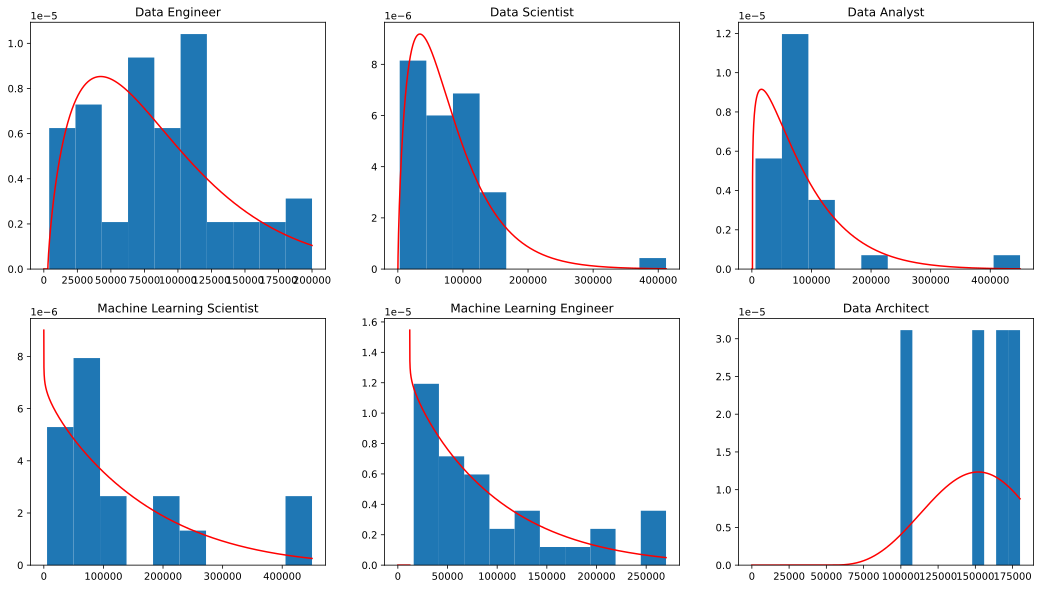

Whole Jobs: a: 1.35 b: 8.38 loc: 0, scale: 650000


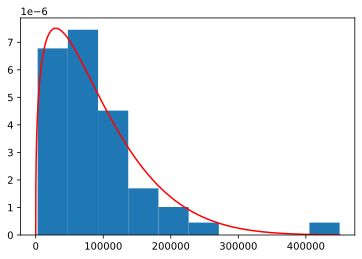

In [74]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,10), dpi=500)

temp = data_copy.loc[data_copy.job_title == "Data Engineer"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=3000, fscale=1000000)
print(f"Data Engineer: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[0, 0].set_title("Data Engineer")
axs[0, 0].hist(temp, density=True)
axs[0, 0].plot(scipy.stats.beta.pdf(np.arange(max(temp)), a, b, loc=loc_, scale=scale_), c='r')

temp = data_copy.loc[data_copy.job_title == "Data Scientist"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=100, fscale=5000000)
print(f"Data Scientist: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[0, 1].set_title("Data Scientist")
axs[0, 1].hist(temp, density=True)
axs[0, 1].plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')

temp = data_copy.loc[data_copy.job_title == "Data Analyst"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=1000, fscale=1000000)
print(f"Data Analyst: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[0, 2].set_title("Data Analyst")
axs[0, 2].hist(temp, density=True)
axs[0, 2].plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')

temp = data_copy.loc[data_copy.job_title == "Machine Learning Scientist"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=0, fscale=1000000)
print(f"Machine Learning Scientist: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[1, 0].set_title("Machine Learning Scientist")
axs[1, 0].hist(temp, density=True)
axs[1, 0].plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')

temp = data_copy.loc[data_copy.job_title == "Machine Learning Engineer"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=12000, fscale=1000000)
print(f"Machine Learning Engineer: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[1, 1].set_title("Machine Learning Engineer")
axs[1, 1].hist(temp, density=True)
axs[1, 1].plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')

temp = data_copy.loc[data_copy.job_title == "Data Architect"].salary_in_usd
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=50000, fscale=180000)
print(f"Data Architect: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[1, 2].set_title("Data Architect")
axs[1, 2].hist(temp, density=True)
axs[1, 2].plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')
plt.show()

# Whole Dataset
temp = data_copy.salary_in_usd
fig, ax = plt.subplots(dpi=300)
a, b, loc_, scale_ = scipy.stats.beta.fit(temp, floc=0, fscale=650000)
print(f"Whole Jobs: a: {a:.2f} b: {b:.2f} loc: {loc_:.0f}, scale: {scale_:.0f}")
axs[1, 2].set_title("Whole Set of AI/ML Jobs")
ax.hist(temp, density=True)
ax.plot(scipy.stats.beta.pdf(np.arange(np.max(temp)), a, b, loc=loc_, scale=scale_), c='r')
plt.show()

Correlation Analysis (ENES)

In [75]:
def cramers_v(confusion_matrix):
 
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [76]:
data_copy.experience_level.unique()

array(['SE', 'EN', 'MI'], dtype=object)

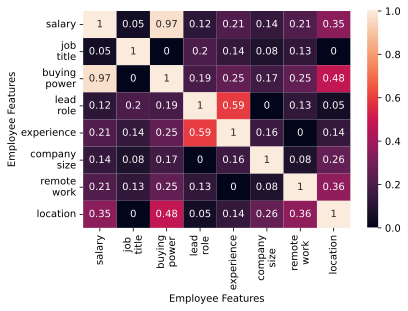

In [77]:
feature_list = [preprocessed_data.salary_in_usd, preprocessed_data.job_title, preprocessed_data.adjusted_buying_power, preprocessed_data.lead, preprocessed_data.experience_level, preprocessed_data.company_size, preprocessed_data.remote_ratio, preprocessed_data.company_location]
length = len(feature_list)
correlation_table = np.zeros((length, length)) 

for i in range(length):
  for j in range(length):
    confusion_matrix = pd.crosstab(feature_list[i], feature_list[j])
    if i == j:
      correlation_table[i, j] = 1.00
    else:
      correlation_table[i, j] = round(cramers_v(confusion_matrix.values), 2) 

names = ["salary", "job\ntitle", "buying\npower", "lead\nrole", "experience", "company\nsize", "remote\nwork", "location"]
correlation_df = pd.DataFrame(data=correlation_table, index=names, columns=names)
sns.heatmap(correlation_df, annot=True, fmt='.2g')
plt.xlabel("Employee Features", fontsize = 10)
plt.ylabel("Employee Features", fontsize = 10)
plt.savefig("CorrelationTable.png")

# Hypothesis 1: Experience Level does not affect the salary in USD. 

In [78]:
entrance_salary = data_copy.loc[data_copy.experience_level == "EN"].salary_in_usd
middle_salary = data_copy.loc[data_copy.experience_level == "MI"].salary_in_usd
senior_salary = data_copy.loc[data_copy.experience_level == "SE"].salary_in_usd
general_salary = preprocessed_data.salary_in_usd


print(scipy.stats.ttest_ind(entrance_salary, general_salary))
print(scipy.stats.ttest_ind(middle_salary, general_salary))
print(scipy.stats.ttest_ind(senior_salary, general_salary))

print(scipy.stats.ttest_ind(entrance_salary, senior_salary))
print(scipy.stats.ttest_ind(entrance_salary, middle_salary))
print(scipy.stats.ttest_ind(middle_salary, senior_salary))

Ttest_indResult(statistic=-3.4253039904764235, pvalue=0.0007000191685251675)
Ttest_indResult(statistic=-1.1109518370188574, pvalue=0.26739786280278893)
Ttest_indResult(statistic=1.0077327880183782, pvalue=0.31444360060775284)
Ttest_indResult(statistic=-4.372140450933834, pvalue=2.9260753621326616e-05)
Ttest_indResult(statistic=-2.332057646627395, pvalue=0.021018774799634026)
Ttest_indResult(statistic=-1.7212107338122107, pvalue=0.08750339338599882)


# Hypothesis 2: Job Title does not affect the salary in USD.

In [79]:
data_analyst_salary = data_copy.loc[data_copy.job_title == "Data Analyst"].salary_in_usd
data_architect_salary = data_copy.loc[data_copy.job_title == "Data Architect"].salary_in_usd
data_engineer_salary = data_copy.loc[data_copy.job_title == "Data Engineer"].salary_in_usd
data_scientist_salary = data_copy.loc[data_copy.job_title == "Data Scientist"].salary_in_usd
ml_engineer_salary = data_copy.loc[data_copy.job_title == "Machine Learning Engineer"].salary_in_usd
ml_scientist_salary = data_copy.loc[data_copy.job_title == "Machine Learning Scientist"].salary_in_usd

general_salary = data_copy.salary_in_usd

print(scipy.stats.ttest_ind(data_analyst_salary, general_salary))
print(scipy.stats.ttest_ind(data_architect_salary, general_salary))
print(scipy.stats.ttest_ind(data_engineer_salary, general_salary))
print(scipy.stats.ttest_ind(data_scientist_salary, general_salary))
print(scipy.stats.ttest_ind(ml_engineer_salary, general_salary))
print(scipy.stats.ttest_ind(data_scientist_salary, general_salary))

# print(scipy.stats.ttest_ind(data_architect_salary, data_analyst_salary))

Ttest_indResult(statistic=-0.639751917257279, pvalue=0.5229762008710254)
Ttest_indResult(statistic=1.659550778859734, pvalue=0.09857204896696402)
Ttest_indResult(statistic=-0.20012030344883489, pvalue=0.8415525042188908)
Ttest_indResult(statistic=-0.9289061863290486, pvalue=0.3538231006647766)
Ttest_indResult(statistic=0.19917300630412982, pvalue=0.8423041445554672)
Ttest_indResult(statistic=-0.9289061863290486, pvalue=0.3538231006647766)


# Hypothesis 3: Lead Role does not affect the salary in USD.

In [80]:
lead_salary = preprocessed_data.loc[preprocessed_data.lead == 1].salary_in_usd
non_lead_salary = preprocessed_data.loc[preprocessed_data.lead == 0].salary_in_usd

print(scipy.stats.ttest_ind(lead_salary, non_lead_salary))

Ttest_indResult(statistic=6.0059934705915845, pvalue=7.064717346770305e-09)


# Hypothesis 4: Company location does not affect the salary in USD.

In [81]:
german_salary = preprocessed_data.loc[preprocessed_data.company_location == "DE"].salary_in_usd
us_salary = preprocessed_data.loc[preprocessed_data.company_location == "US"].salary_in_usd

print(scipy.stats.ttest_ind(us_salary, general_salary))
print(scipy.stats.ttest_ind(us_salary, german_salary))
print(scipy.stats.ttest_ind(german_salary, general_salary))

Ttest_indResult(statistic=6.82209746825921, pvalue=4.930632350174339e-11)
Ttest_indResult(statistic=3.1342732330859575, pvalue=0.0021508380705142095)
Ttest_indResult(statistic=0.08178184772559152, pvalue=0.9348955730369928)


# Overview over the data





## Countrys: Use 7 most frequent + others.

In [82]:
most_appearing_countries_count = 7
most_appearing_countries = preprocessed_data.employee_residence.value_counts().index[ : most_appearing_countries_count].tolist()
most_appearing_countries.append('other')
data_other_country = preprocessed_data.copy()
data_other_country.loc[~data_other_country.employee_residence.isin(most_appearing_countries), "employee_residence"] = "other"
data_other_country.loc[~data_other_country.company_location.isin(most_appearing_countries), "company_location"] = "other"

Text(0.5, 1.0, 'Cost of Living')

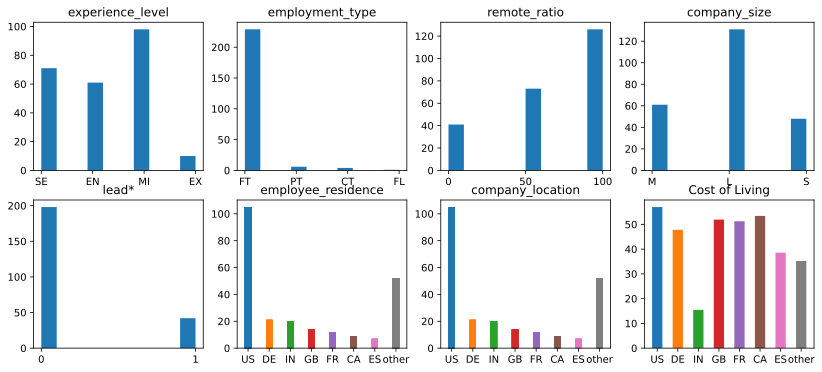

In [83]:
keys = preprocessed_data.columns
special_treatment_keys = ["job_title", "salary_in_usd", "adjusted_buying_power", "employee_residence", "company_location"]
ignored_keys = ["salary_currency", "salary", "work_year"]
basic_histogram_keys = [item for item in keys if item not in special_treatment_keys if item not in ignored_keys]

fig, axes = plt.subplots(nrows = math.ceil(len(basic_histogram_keys) / 4), ncols = 4, dpi = 2000, figsize=(14,math.ceil(len(basic_histogram_keys) / 4) * 3))
for ax, key in zip(axes.ravel(), basic_histogram_keys):
  
  ax.hist(preprocessed_data[key])
  if (key == "remote_ratio"):
    ax.set_xticks([0, 50, 100])
  if key == "lead":
    ax.set_xticks([0,1])
    key = "lead*"
  ax.set_title(key);

# Plot the Country Plots
for i, country in enumerate(most_appearing_countries):
  axes[1,1].bar(data_other_country[data_other_country.employee_residence == country].employee_residence, len(data_other_country[data_other_country.employee_residence == country].employee_residence), width = 0.3)

  axes[1,1].set_title("employee_residence")
for i, country in enumerate(most_appearing_countries):
  axes[1,2].bar(data_other_country[data_other_country.employee_residence == country].employee_residence, len(data_other_country[data_other_country.employee_residence == country].employee_residence), width = 0.3)

  axes[1,2].set_title("company_location")

# Plot Cost Of Living
for i, country in enumerate(most_appearing_countries[ : len(most_appearing_countries) - 1]):
    axes[1,3].bar(i, float( data_cost_of_living[data_cost_of_living ["Country Code"] == country]["Cost of Living Plus Rent Index"]), width = 0.5, label = country)

mean_cost_of_living_other = data_cost_of_living[~ data_cost_of_living ["Country Code"].isin(most_appearing_countries)]["Cost of Living Plus Rent Index"].astype(np.float).values.mean()
axes[1,3].bar(len (most_appearing_countries ) - 1, mean_cost_of_living_other, width = 0.5, label = "Other")

axes[1,3].set_xticks(range(len(most_appearing_countries)))
axes[1,3].set_xticklabels([] + most_appearing_countries)
axes[1,3].set_title("Cost of Living")


#fig.suptitle("Overview over small categorical entries in the data (TODO: Better title)")



Text(0.5, 1.0, 'Job Title Categories')

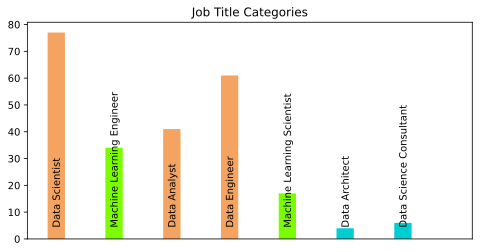

In [84]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 1000, figsize=(8,4))

for i, title in enumerate(preprocessed_data.job_title.unique()):
  color = "darkturquoise"
  if "Data Analyst" in title or "Data Scientist" in title or "Data Engineer" in title:
    color = "sandybrown"
  if "Machine Learning" in title:
    color = "lawngreen"
  

  ax.hist(preprocessed_data.job_title[preprocessed_data.job_title == title], bins = 1, width = 0.3, color = color)
  ax.text(i - 0.42, 5, title, rotation = 90, color = "black")
ax.set_xticks([])
ax.set_title("Job Title Categories")

# (ENES ASKS) Why CONSULTANT appears??


## Countrys


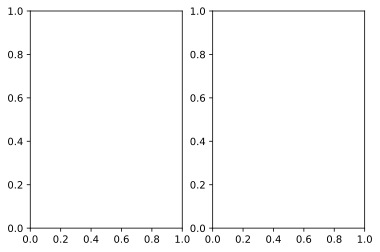

In [85]:
most_appearing_countries_count = 7
most_appearing_countries = preprocessed_data.employee_residence.value_counts().index[ : most_appearing_countries_count].tolist()
most_appearing_countries.append('other')
data_other_country = preprocessed_data.copy()
data_other_country.loc[~data_other_country.employee_residence.isin(most_appearing_countries), "employee_residence"] = "other"
data_other_country.loc[~data_other_country.company_location.isin(most_appearing_countries), "company_location"] = "other"


fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 1000, figsize=(6,4))





In [86]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lead,adjusted_buying_power
0,2022,SE,FT,Data Scientist,148000,EUR,167981,DE,100,DE,M,1,351571
1,2021,SE,FT,Machine Learning Engineer,24000,USD,24000,BR,100,BR,M,0,111420
2,2021,MI,FT,Machine Learning Scientist,38400,USD,38400,VN,100,US,M,0,147070
3,2022,EN,FT,Data Analyst,100000,USD,100000,US,50,US,L,0,175500
4,2021,MI,FT,Data Scientist,82500,USD,82500,US,100,US,S,0,144787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,0,723060
274,2021,MI,FT,Data Scientist,151000,USD,151000,US,100,US,L,1,265005
275,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0,184275
276,2020,EN,CT,Data Analyst,100000,USD,100000,US,100,US,L,0,175500


Text(0.5, 1.0, 'Cost of Living')

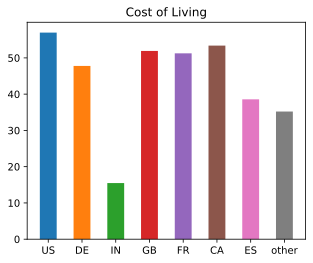

In [87]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, dpi = 2000, figsize=(5,4))
#data_most_appearing_countries_cost = [data_cost_of_living ["Country Code"].isin(most_appearing_countries)]["Cost of Living Plus Rent Index"])
for i, country in enumerate(most_appearing_countries[ : len(most_appearing_countries) - 1]):
    ax.bar(i, float( data_cost_of_living[data_cost_of_living ["Country Code"] == country]["Cost of Living Plus Rent Index"]), width = 0.5, label = country)

mean_cost_of_living_other = data_cost_of_living[~ data_cost_of_living ["Country Code"].isin(most_appearing_countries)]["Cost of Living Plus Rent Index"].astype(np.float).values.mean()
ax.bar(len (most_appearing_countries ) - 1, mean_cost_of_living_other, width = 0.5, label = "Other")

ax.set_xticks(range(len(most_appearing_countries)))
ax.set_xticklabels([] + most_appearing_countries)
ax.set_title("Cost of Living")

In [88]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lead,adjusted_buying_power
0,2022,SE,FT,Data Scientist,148000,EUR,167981,DE,100,DE,M,1,351571
1,2021,SE,FT,Machine Learning Engineer,24000,USD,24000,BR,100,BR,M,0,111420
2,2021,MI,FT,Machine Learning Scientist,38400,USD,38400,VN,100,US,M,0,147070
3,2022,EN,FT,Data Analyst,100000,USD,100000,US,50,US,L,0,175500
4,2021,MI,FT,Data Scientist,82500,USD,82500,US,100,US,S,0,144787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,0,723060
274,2021,MI,FT,Data Scientist,151000,USD,151000,US,100,US,L,1,265005
275,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,0,184275
276,2020,EN,CT,Data Analyst,100000,USD,100000,US,100,US,L,0,175500


## Overview Salary in USD


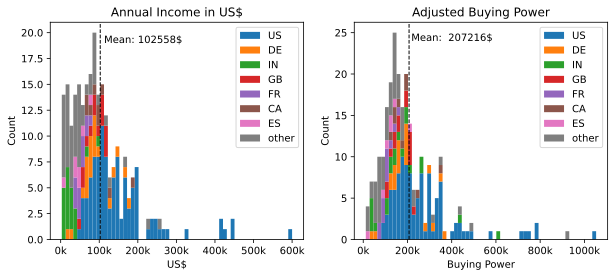

In [89]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 2000, figsize=(10,4))

data_salary_in_usd_split_by_countries = []
data_adjusted_buying_power_split_by_countries = []
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   # TODO I turn of a warning here. ok?       
for country in most_appearing_countries:
  data_salary_in_usd_split_by_countries.append(data_other_country.salary_in_usd[data_other_country.employee_residence == country])
  data_adjusted_buying_power_split_by_countries.append(data_other_country.adjusted_buying_power[data_other_country.employee_residence == country])



axes[0].hist(data_salary_in_usd_split_by_countries, bins = 60, histtype='bar', stacked=True, label = most_appearing_countries)


mean = preprocessed_data.salary_in_usd.mean()
axes[0].axvline(mean, color='k', linestyle='dashed', linewidth=1)
axes[0].text(mean + 10000, 19, "Mean: " + str(math.floor(mean)) + "$", rotation = 0, color = "k")
current_values = axes[0].get_xticks()
axes[0].set_xticklabels([ str(math.floor(x / 1000)) + "k" for x in current_values])  #'{:,.0f}'.format(x)
axes[0].set_title ("Annual Income in US$")
axes[0].set_xlabel ("US$")
axes[0].set_ylabel ("Count")
axes[0].legend()



axes[1].hist(data_adjusted_buying_power_split_by_countries, bins = 60, histtype='bar', stacked=True, label = most_appearing_countries)
mean = preprocessed_data.adjusted_buying_power.mean()
axes[1].axvline(mean, color='k', linestyle='dashed', linewidth=1)
axes[1].text(mean + 10000, 24, "Mean:  " + str(math.floor(mean)) + "$", rotation = 0)
current_values = axes[1].get_xticks()
axes[1].set_xticklabels([ str(math.floor(x / 1000)) + "k" for x in current_values])  #'{:,.0f}'.format(x)
axes[1].set_title ("Adjusted Buying Power")
axes[1].set_xlabel ("Buying Power")
axes[1].set_ylabel ("Count")
axes[1].legend()

